<a href="https://colab.research.google.com/github/pawanraje16/CVDLlab/blob/main/cvdlLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# <!-- q1.modify brightness of the image by performing operoperate operation
# q2.modify contrast of the image using filters and compare their result
# q3.remove noise from the image using linear filters
# q4. using non lineat filter
# q5. identify the edge of the image using appropriate filter. -->

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img=cv2.imread('cat.jpg')

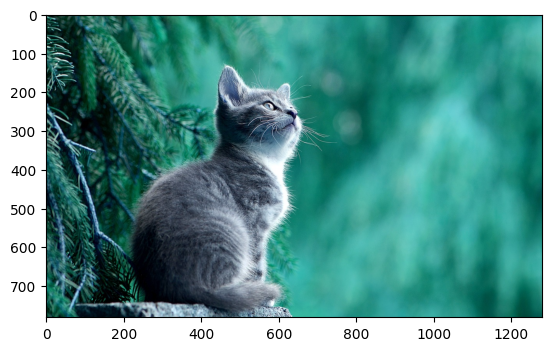

In [4]:
#display the image
plt.imshow(img)
plt.show()

In [5]:
#Convert from BGR to RGB  for proper color display
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


In [6]:
rgb_img.shape


(781, 1280, 3)

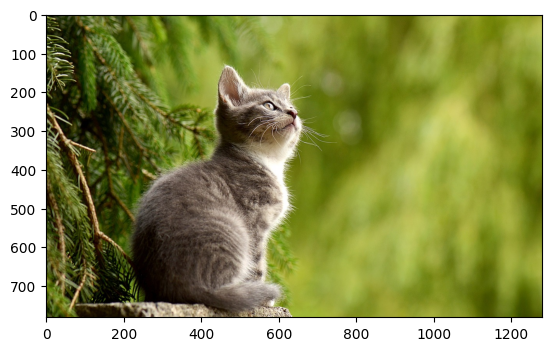

In [7]:
plt.imshow(rgb_img)
plt.show()

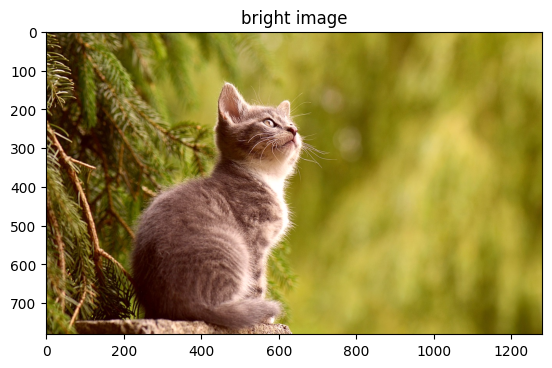

In [8]:
# q1.modify brightness of the image by performing operoperate operation

# Point wise operation to change bright and contrast

bright_img=cv2.add(rgb_img,np.array([25],dtype=np.uint8)) # Brighten by 25])
contrast_img=cv2.subtract(rgb_img,np.array([25],dtype=np.uint8)) #Daren by 25

plt.imshow(bright_img)
plt.title("bright image")
plt.show()

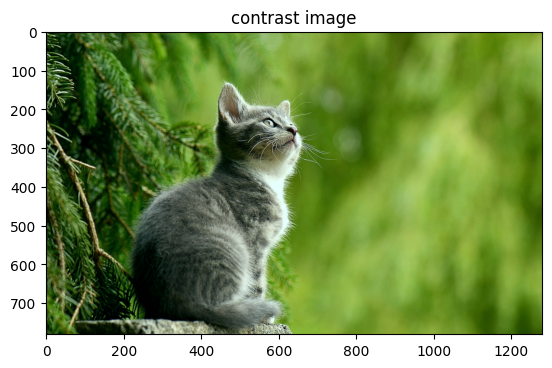

In [9]:
plt.imshow(contrast_img)
plt.title("contrast image")
plt.show()

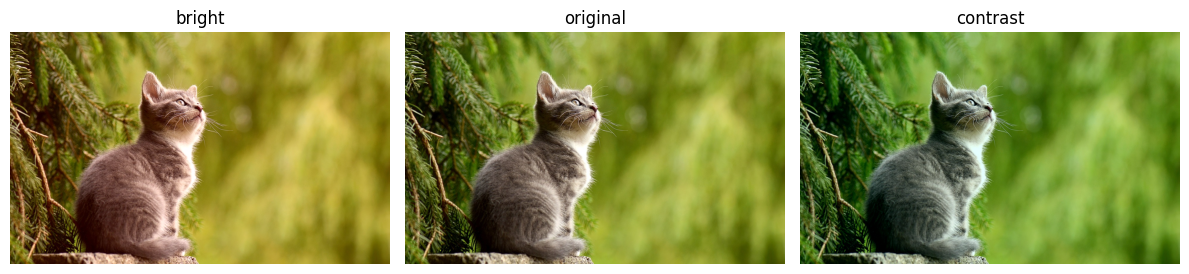

In [14]:
titles1=['bright','original','contrast']
point_img=[bright_img,rgb_img,contrast_img]
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(point_img[i], cmap='gray')
    plt.title(titles1[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
# q1 , part 2 local operation
# local operation : contrast adjustment with a kernel
def local_contrast_adjust(rgb_img,kernel_size):
  kernel=np.ones((kernel_size,kernel_size), np.float32)/(kernel_size*kernel_size)
  smoothed=cv2.filter2D(rgb_img,-1,kernel)
  return np.clip(2*rgb_img-smoothed,0,255).astype(np.uint8) #convoluation operation

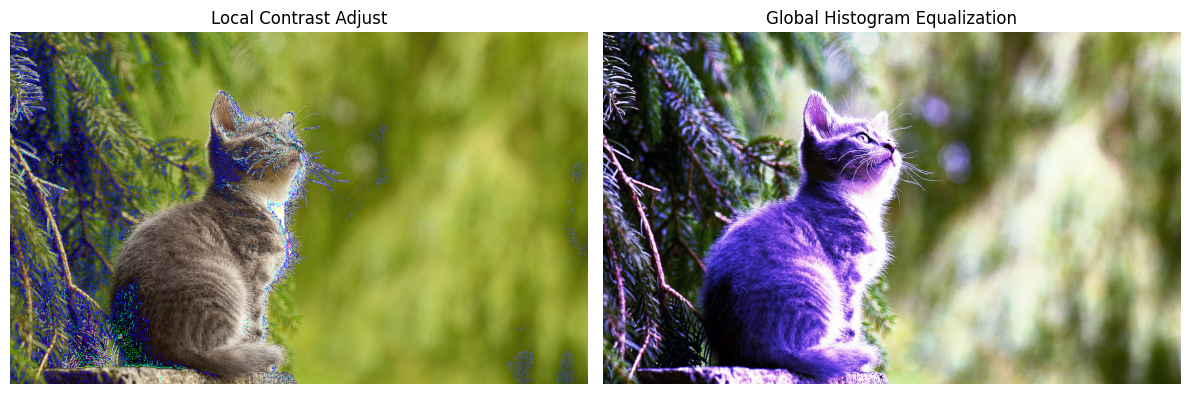

In [32]:
# Global histogram equalization function
def global_histogram_equaliztion(rgb_img):
    b, g, r = cv2.split(rgb_img)
    b_eq = cv2.equalizeHist(b)
    g_eq = cv2.equalizeHist(g)
    r_eq = cv2.equalizeHist(r)
    return cv2.merge((b_eq, g_eq, r_eq))


# Apply operations
local_contrast = local_contrast_adjust(rgb_img, 3)
global_histo = global_histogram_equaliztion(rgb_img)

# Correctly pass the variables, not strings
titles2 = ['Local Contrast Adjust', 'Global Histogram Equalization']
image2 = [local_contrast, global_histo]  # Use variables, not strings

# Display the results
plt.figure(figsize=(12, 8))
for i in range(2):
    plt.subplot(1, 2, i + 1)  # Use 1 row and 2 columns
    plt.imshow(image2[i], cmap='gray')
    plt.title(titles2[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [41]:
# add noise
# rgb_img[:,:,0] = rgb_img[:,:,0] + noise[:,:,0]
# rgb_img[:,:,1] = rgb_img[:,:,1] + noise[:,:,1]
# rgb_img[:,:,2] = rgb_img[:,:,2] + noise[:,:,2]
noise_img=rgb_img.copy()
noise_img[1:3,1:2,0]=noise_img[1:3,1:2,0]+100
print(noise_img[1:2,1:2,0])

[[130]]


In [40]:
print(rgb_img[:,:,0])
print("****")
print(noise_img[:,:,0])

[[ 32  36  70 ... 158 157 156]
 [ 25  30  42 ... 159 159 160]
 [ 14  20  33 ... 159 161 163]
 ...
 [ 19  23  28 ...  82  86  84]
 [ 25  29  30 ...  81  84  83]
 [ 28  32  33 ...  80  84  84]]
****
[[ 32  36  70 ... 158 157 156]
 [ 25  50  42 ... 159 159 160]
 [ 14  20  33 ... 159 161 163]
 ...
 [ 19  23  28 ...  82  86  84]
 [ 25  29  30 ...  81  84  83]
 [ 28  32  33 ...  80  84  84]]


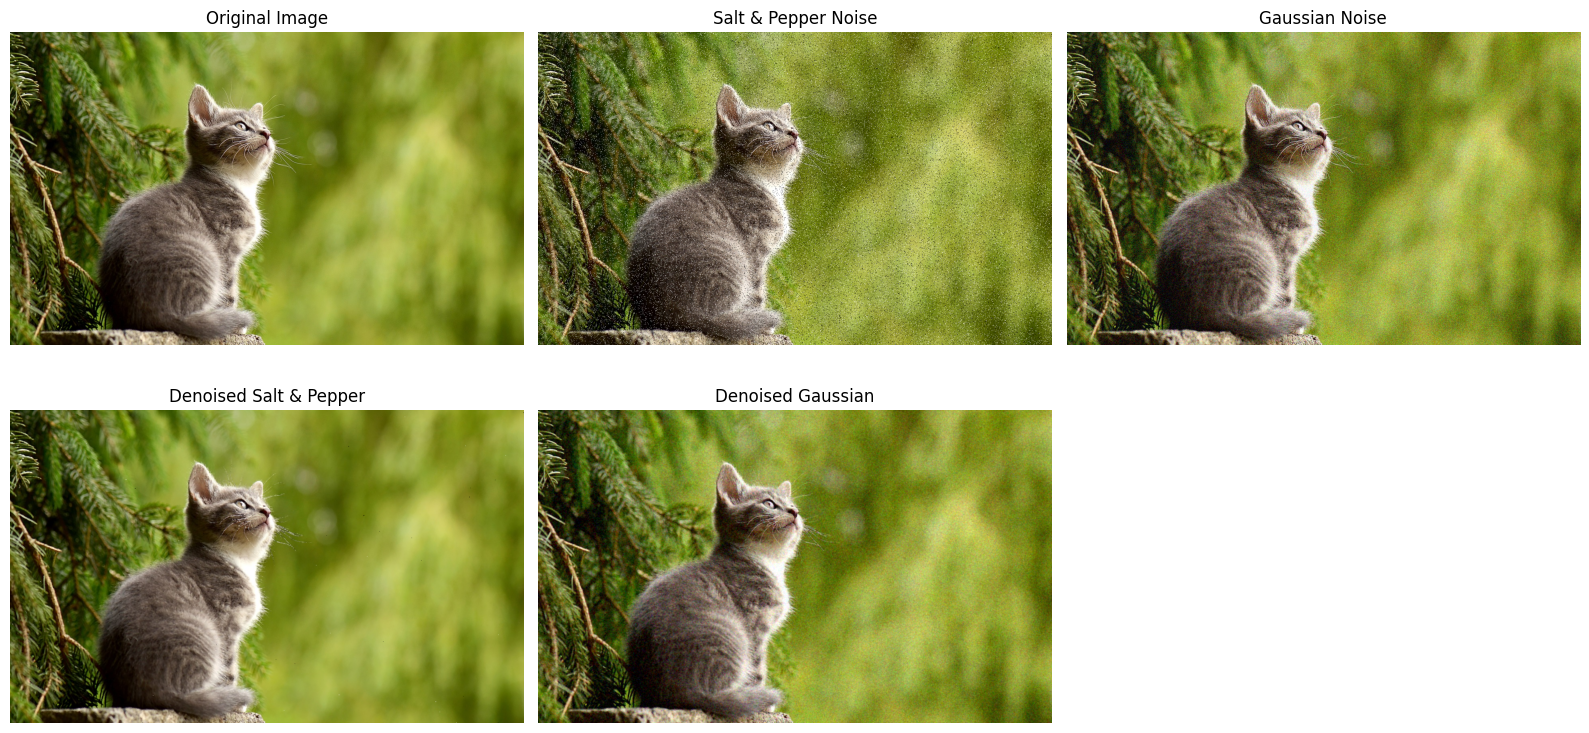

In [47]:
# q3
import random


# Function to add random noise to specific pixels
def add_noise_to_image(image, noise_percentage=0.8, noise_type="salt_and_pepper"):
    """
    Add noise to an image on a certain percentage of pixels.

    Parameters:
        image (numpy.ndarray): Input image
        noise_percentage (float): Percentage of pixels to add noise (0-1)
        noise_type (str): Type of noise to add ('salt_and_pepper' or 'gaussian')

    Returns:
        noisy_image (numpy.ndarray): Image with added noise
    """
    noisy_image = image.copy()
    h, w, c = noisy_image.shape
    num_noisy_pixels = int(noise_percentage * h * w)

    if noise_type == "salt_and_pepper":
        for _ in range(num_noisy_pixels):
            x, y = random.randint(0, h - 1), random.randint(0, w - 1)
            noisy_image[x, y] = random.choice([0, 255])  # Salt (white) or Pepper (black)

    elif noise_type == "gaussian":
        mean = 0
        std_dev = 25  # Standard deviation for Gaussian noise
        gaussian_noise = np.random.normal(mean, std_dev, (h, w, c))
        noisy_image = np.clip(noisy_image + gaussian_noise, 0, 255).astype(np.uint8)

    return noisy_image

# Function to denoise the image using a median filter
def denoise_image(image):
    """
    Denoise the image using a median filter.

    Parameters:
        image (numpy.ndarray): Input image with noise

    Returns:
        denoised_image (numpy.ndarray): Denoised image
    """
    return cv2.medianBlur(image, 3)  # Apply a median blur with kernel size 3

# Load the image
image_path = "cat.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Add salt-and-pepper noise with higher intensity
noisy_image_sp = add_noise_to_image(image, noise_percentage=0.1, noise_type="salt_and_pepper")

# Add Gaussian noise with higher intensity
noisy_image_gaussian = add_noise_to_image(image, noise_percentage=0.1, noise_type="gaussian")

# Denoise the noisy images using median filter
denoised_image_sp = denoise_image(noisy_image_sp)
denoised_image_gaussian = denoise_image(noisy_image_gaussian)

# Display the images
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(noisy_image_sp)
plt.title("Salt & Pepper Noise")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(noisy_image_gaussian)
plt.title("Gaussian Noise")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(denoised_image_sp)
plt.title("Denoised Salt & Pepper")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(denoised_image_gaussian)
plt.title("Denoised Gaussian")
plt.axis("off")

plt.tight_layout()
plt.show()


In [62]:
#Apply Sobel filters to calculate gradients in the x and y directions
sobel_x=cv2.Sobel(rgb_img,cv2.CV_64F,1,0,ksize=3) # Gradient in X direction
sobel_y=cv2.Sobel(rgb_img,cv2.CV_64F,0,1,ksize=3) # Gradient in Y direction

In [63]:
type(sobel_x)

numpy.ndarray

In [64]:
sobel_x.shape

(781, 1280, 3)

In [65]:
sobel_x.max()

960.0

In [66]:
sobel_x.min()

-854.0

In [67]:
# Calculate the gradient magnitude
gradient_magnitude=np.sqrt(sobel_x**2+sobel_y**2)
# Normalize to 0-255
# gradient_magnitude=np.unit8(gradient_magnitude/gradient_magnitude.max()*255)

In [68]:
gradient_magnitude.shape

(781, 1280, 3)

In [69]:
gradient_magnitude.max()

1028.414313397086

In [70]:
gradient_magnitude.min()

0.0

In [71]:
# Normalize Sobel outputs to 0-255 for display
sobel_x_display=cv2.normalize(np.abs(sobel_x),None,0,255,cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display=cv2.normalize(np.abs(sobel_y),None,0,255,cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display=cv2.normalize(gradient_magnitude,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)

In [72]:
print(sobel_x_display.max())
print(sobel_x_display.min())
print(sobel_x_display.shape)

255
0
(781, 1280, 3)


In [74]:
print(gradient_magnitude_display.max())
print(gradient_magnitude_display.min())
print(gradient_magnitude_display.shape)

255
0
(781, 1280, 3)


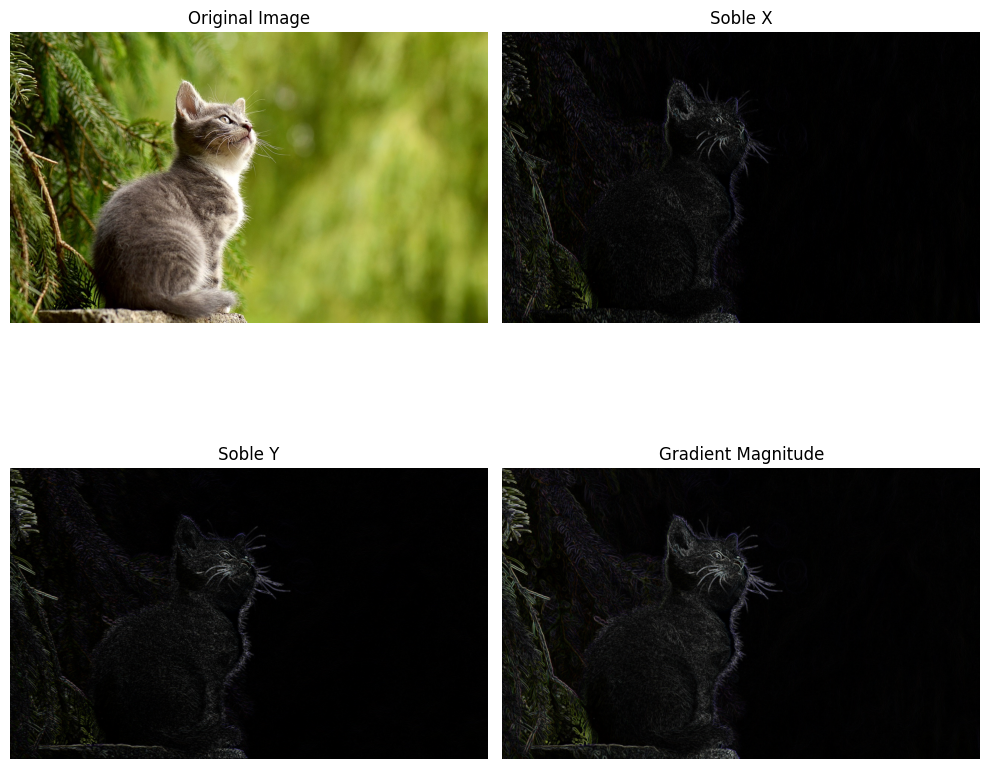

In [75]:
# Display the results

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Soble X")
plt.imshow(sobel_x_display,cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Soble Y")
plt.imshow(sobel_y_display,cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display,cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Write a program to compute second-order gradients using the Laplacian operator

In [76]:
#Load the image
image=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)


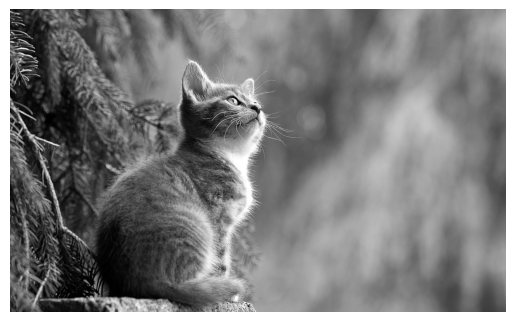

In [78]:
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [79]:
#Compute the Laplacian (second-order gradients)
laplacian=cv2.Laplacian(image,cv2.CV_64F,ksize=3)

#Normalize the lapacian for better visualization
laplacian_normalized=cv2.normalize(laplacian,None,0,255,cv2.NORM_MINMAX)

# Convert to uint8 for display
laplacian_uint8=laplacian_normalized.astype(np.uint8)

In [80]:
laplacian.shape

(781, 1280)

In [81]:
laplacian_normalized.shape

(781, 1280)

In [82]:
laplacian_uint8.shape

(781, 1280)

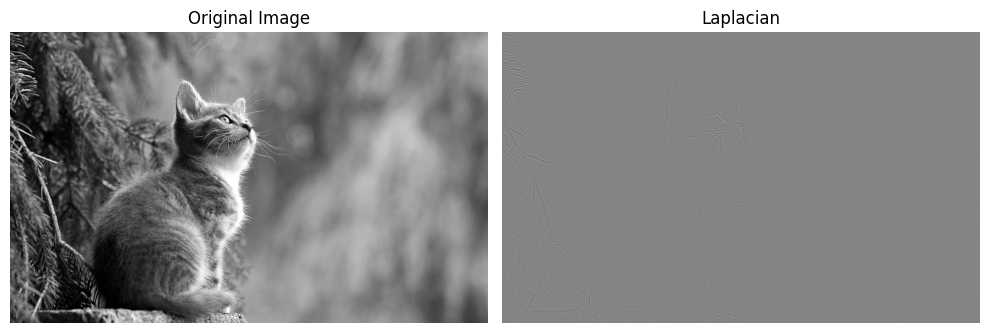

In [83]:
#Display the original image and the Laplacian
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Laplacian")
plt.imshow(laplacian_uint8,cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()